In [2]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments_filename = './datasets/enrollments.csv'
engagement_filename = './datasets/daily_engagement.csv'
submissions_filename = './datasets/project_submissions.csv'

enrollments = read_csv(enrollments_filename) 
daily_engagement = read_csv(engagement_filename)  
project_submissions =  read_csv(submissions_filename) 

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}
{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


In [3]:
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [4]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for row in enrollments:
    row['cancel_date'] = parse_date(row['cancel_date'])
    row['days_to_cancel'] = parse_maybe_int(row['days_to_cancel'])
    row['is_canceled'] = row['is_canceled'] == 'True'
    row['is_udacity'] = row['is_udacity'] == 'True'
    row['join_date'] = parse_date(row['join_date'])
    
print(enrollments[0])

# Clean up the data types in the engagement table
for row in daily_engagement:
    row['lessons_completed'] = int(float(row['lessons_completed']))
    row['num_courses_visited'] = int(float(row['num_courses_visited']))
    row['projects_completed'] = int(float(row['projects_completed']))
    row['total_minutes_visited'] = float(row['total_minutes_visited'])
    row['utc_date'] = parse_date(row['utc_date'])

print(daily_engagement[0])

# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print(project_submissions[0])

{'account_key': '448', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), 'days_to_cancel': 65, 'is_udacity': True, 'is_canceled': True}
{'acct': '0', 'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0}
{'creation_date': datetime.datetime(2015, 1, 14, 0, 0), 'completion_date': datetime.datetime(2015, 1, 16, 0, 0), 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


In [5]:
for row in daily_engagement:
    row['account_key'] = row['acct']
    del(row['acct'])

In [6]:
daily_engagement[0]

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

### Question Phase

- Investigating the Data:

For each of these three tables, find the number of rows in the table and the number of unique students in the table. To find the number of unique students, you might want to create a set of the account keys in each table.

In [7]:
def get_unique_students(data): 
    unique_students = set() 
    for data_point in data: 
        unique_students.add(data_point['account_key']) 
    return unique_students

In [8]:
enrollment_num_rows = len(enrollments)
print('Number of rows in the enrollment table is', enrollment_num_rows)
enrollment_num_unique_students = get_unique_students(enrollments)  # Replace this with your code
print('Number of unique students in the enrollment table is', len(enrollment_num_unique_students))

print('---------------')

engagement_num_rows = len(daily_engagement)
print('Number of rows in the daily_engagement table is', engagement_num_rows)
engagement_num_unique_students = get_unique_students(daily_engagement)  # Replace this with your code
print('Number of unique students in the daily_engagement table is', len(engagement_num_unique_students))

print('---------------')

submission_num_rows = len(project_submissions)
print('Number of rows in the project_submissions table is',submission_num_rows)
submission_num_unique_students = get_unique_students(project_submissions)  # Replace this with your code
print('Number of unique students in the project_submissions table is', len(submission_num_unique_students))


Number of rows in the enrollment table is 1640
Number of unique students in the enrollment table is 1302
---------------
Number of rows in the daily_engagement table is 136240
Number of unique students in the daily_engagement table is 1237
---------------
Number of rows in the project_submissions table is 3642
Number of unique students in the project_submissions table is 743


- Why there more students in enrollment table than engagement table?

### Wrangling Phase

Investigating First Problem:

- Why are students missing from daily_engagement?

    1) Identify surprising data points: any enrollment record with no corresponding engagement data
    2) Print out one or more a few surprising data points

In [9]:
for row in enrollments:
    student = row['account_key']
    if student not in engagement_num_unique_students:
        print(row)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


In [10]:
num_problem_students = 0
for row in enrollments:
    student = row['account_key']
    if (student not in engagement_num_unique_students and 
            row['join_date'] != row['cancel_date']):
        print(row)
        num_problem_students += 1

num_problem_students

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


3

Contas de teste:

In [11]:
udacity_test_accounts = set()
for row in enrollments:
    if row['is_udacity'] == True:
        udacity_test_accounts.add(row['account_key'])
len(udacity_test_accounts)

6

Removendo as contas de teste do dataset

In [12]:
def remove_udacity_accounts(data):
    non_udacity_data=[]
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


### Explore Phase

Question: How do numbers in the daily engagement table differ for students who pass the first project?

1) This will include data from after the project submission
2) This compares data from different lenghts of time
3) Includes engagement in courses not related to the first project

Revision: Only look at engagement from first week, and exclude students who cancel within a week.

**Getting Started**

Create a dictionary of students who either:
- haven't canceled yet ('days_to_cancel' is None)
- stayed enrolled more than 7 days ('days_to_cancel' > 7)

keys: account_keys,
values: enrollment date

Name your dictionary paid_students. 
How many students are in the dict?

In [14]:
paid_students = {}
for row in non_udacity_enrollments:
    if row['days_to_cancel'] != 0:
        if (not row['days_to_cancel']) or (row['days_to_cancel'] > 7):
            account_key = row['account_key']
            enrollment_date = row['join_date']
            if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
                paid_students[account_key] = enrollment_date
len(paid_students)

995

In [15]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

Create a list of rows from the engagement table including only rows where the student is one of the paid students you just found, and the date is within one week of the student's join date.

In [16]:
def remove_free_trial_cancels(data):
    new_data = []
    for row in data:
        if row['account_key'] in paid_students:
            new_data.append(row)
    return new_data

In [17]:
def len_paid_ds(data, str_data):
    return print(f"{str_data.replace('_', ' ').capitalize()} tem {len(data)} linhas")

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
len_paid_ds(paid_enrollments, 'paid_enrollments')
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
len_paid_ds(paid_engagement, 'paid_engagement')
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
len_paid_ds(paid_submissions, 'paid_submissions')

Paid enrollments tem 1293 linhas
Paid engagement tem 134549 linhas
Paid submissions tem 3618 linhas


In [18]:
for row in paid_engagement:
    if row['num_courses_visited'] > 0:
        row['has_visited'] = 1
    else:
        row['has_visited'] = 0

In [19]:
paid_engagement

[{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 11.6793745,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0',
  'has_visited': 1},
 {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 37.2848873333,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0',
  'has_visited': 1},
 {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 53.6337463333,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0',
  'has_visited': 1},
 {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 33.4892696667,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0',
  'has_visited': 1},
 {'utc_date': datetime.datetime(2015, 1, 13, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 64.7796776667,
  'lessons

In [20]:
paid_engagement_in_first_week = []
for row in paid_engagement:
    account_key = row['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = row['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(row)

len(paid_engagement_in_first_week)

21508

In [21]:
from collections import defaultdict
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [24]:
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [25]:
import numpy as np

total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 647.5901738262695
Standard deviation: 1129.2712104188108
Minimum: 0.0
Maximum: 10568.100867332541


* Problema: o máximo deu 10568 minutos, que é mais que uma semana. Tem algo errado!!

#### Analyzing the number of days the student visited the classroom:

In [26]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def describe_data(data):
    total_minutes = list(data.values())
    return print('Mean:', np.mean(total_minutes), '- Standard deviation:', np.std(total_minutes), '- Minimum:', np.min(total_minutes), '- Maximum:', np.max(total_minutes))

In [27]:
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [28]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account)

Mean: 3.0924623115577887 - Standard deviation: 5.362768866632357 - Minimum: 0 - Maximum: 43


In [29]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account)

Mean: 6.896482412060301 - Standard deviation: 11.874398696797016 - Minimum: 0 - Maximum: 80


In [30]:
total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += 1
    total_lessons_by_account[account_key] = total_lessons


total_lessons = list(total_lessons_by_account.values())
print('Mean:', np.mean(total_lessons))
print('Standard deviation:', np.std(total_lessons))
print('Minimum:', np.min(total_lessons))
print('Maximum:', np.max(total_lessons))

Mean: 21.61608040201005
Standard deviation: 36.80590599747604
Minimum: 1
Maximum: 241


In [31]:
problem_time = 0
problem_student = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > problem_time:
        problem_time = total_minutes
        problem_student = student
print(problem_time)
print(problem_student)

total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        delta = engagement_record['utc_date'] - paid_students[account_key]
        if delta.days >= 0:
            total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

10568.100867332541
108
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


### Debugging Data Problems

In [32]:
#####################################
#                 9                 #
#####################################
def find_total(data, key):
    total_by_account = {}
    for account_key, engagement_for_student in data.items():
        total = 0
        for engagement_record in engagement_for_student:
            delta = engagement_record['utc_date'] - paid_students[account_key]
            if delta.days >= 0:
                total += engagement_record[key]
        total_by_account[account_key] = total
    return total_by_account

total_lessons_by_account = find_total(engagement_by_account,'lessons_completed')
total_lessons = total_lessons_by_account.values()
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [33]:

######################################
#                 10                 #
######################################

for engagement in non_udacity_engagement:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0
        
total_days_by_account = find_total(engagement_by_account, 'has_visited')
total_days = total_days_by_account.values()
print 'Mean:', np.mean(total_days)
print 'Standard deviation:', np.std(total_days)
print 'Minimum:', np.min(total_days)
print 'Maximum:', np.max(total_days)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1238897721.py, line 13)

In [ ]:
######################################
#                 11                 #
######################################

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

passed_student = set()
for submission in paid_submission:
    rating = submission['assigned_rating']
    lesson = submission['lesson_key']
    student = submission['account_key']
    if lesson in subway_project_lesson_keys and rating in ['PASSED', 'DISTINCTION']:
        passed_student.add(student)
        
for engagement in paid_engagement_in_first_week:
    student = engagement['account_key']
    if student in passed_student:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print len(passed_student)
print len(passing_engagement)
print len(non_passing_engagement)

649
15604
6277


In [ ]:
######################################
#                 12                 #
######################################
def group_data(data):
    data_by_account = defaultdict(list)
    for data_point in data:
        account_key = data_point['account_key']
        data_by_account[account_key].append(data_point)
    return data_by_account

passing_engagement_by_account = group_data(passing_engagement)
non_passing_engagement_by_account = group_data(non_passing_engagement)

def print_statistics(data, key):
    total_data_by_account = find_total(data, key)
    total = total_data_by_account.values()
    print 'Mean:', np.mean(total)
    print 'Standard deviation:', np.std(total)
    print 'Minimum:', np.min(total)
    print 'Maximum:', np.max(total)

print "===Passing Engagement==="
print_statistics(passing_engagement_by_account, 'total_minutes_visited')
print "===Non Passing Engagement==="
print_statistics(non_passing_engagement_by_account, 'total_minutes_visited')

===Passing Engagement===
Mean: 393.502220982
Standard deviation: 448.238343086
Minimum: 0.0
Maximum: 3564.7332645
===Non Passing Engagement===
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


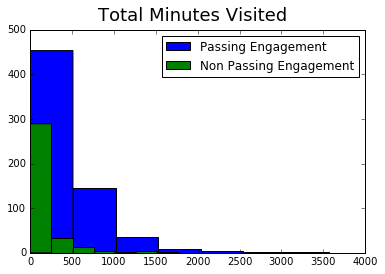

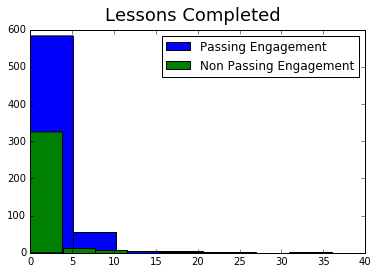

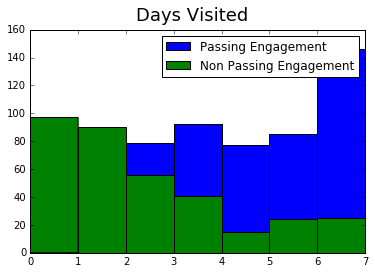

In [ ]:

######################################
#                 13                 #
######################################

%pylab inline
import matplotlib.pyplot as plt
def print_histogram(data, key, label):
    total_data_by_account = find_total(data, key)
    total = total_data_by_account.values()
    plt.hist(total, bins=7, label=label)
    plt.legend()

plt.figure()
plt.suptitle('Total Minutes Visited', fontsize=18)
print_histogram(passing_engagement_by_account, 'total_minutes_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'total_minutes_visited', 'Non Passing Engagement')
plt.figure()
plt.suptitle('Lessons Completed', fontsize=18)
print_histogram(passing_engagement_by_account, 'lessons_completed', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'lessons_completed', 'Non Passing Engagement')
plt.figure()
plt.suptitle('Days Visited', fontsize=18)
print_histogram(passing_engagement_by_account, 'has_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'has_visited', 'Non Passing Engagement')

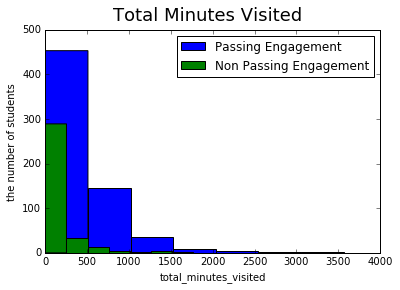

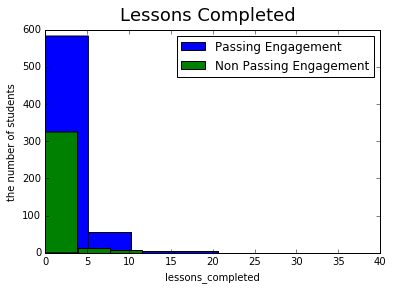

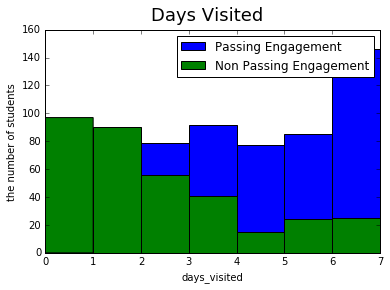

In [ ]:
######################################
#                 14                 #
######################################

plt.figure()
plt.suptitle('Total Minutes Visited', fontsize=18)
plt.xlabel("total_minutes_visited")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'total_minutes_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'total_minutes_visited', 'Non Passing Engagement')

plt.figure()
plt.suptitle('Lessons Completed', fontsize=18)
plt.xlabel("lessons_completed")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'lessons_completed', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'lessons_completed', 'Non Passing Engagement')

plt.figure()
plt.suptitle('Days Visited', fontsize=18)
plt.xlabel("days_visited")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'has_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'has_visited', 'Non Passing Engagement')